## Single Node Use Case

In [2]:
import sys
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scalablexplain.lime.single_node import LIMEExplainer

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="label")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

model, X_train, X_test, input_cols, class_names = model, X_train_scaled, X_test_scaled, data.feature_names.tolist(), data.target_names.tolist()

In [5]:
explainer = LIMEExplainer(
model=model,
input_cols=input_cols,
class_names=class_names,
mode="classification",
target_classes=[1],  # Explain the positive class
background_data=X_train.sample(n=100, random_state=42),
num_samples=1000
)

explainer.build_explainer(X_train)

[INFO] Explaining 50 samples...


/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid f

[INFO] Plotting beeswarm LIME values...


/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-

[INFO] LIME plot saved to lime_output_multi.png


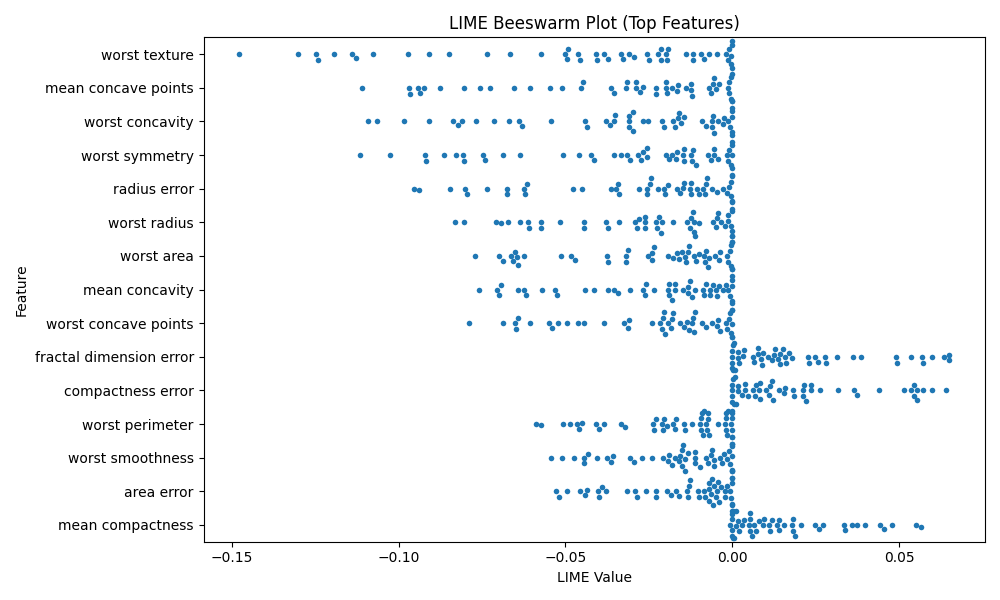

In [9]:
from IPython.display import Image, display

# -------- Beeswarm Plot for 50 Points --------
print("[INFO] Explaining 50 samples...")
subset_df = X_test.head(50)
lime_df = explainer.explain(subset_df)
print("[INFO] Plotting beeswarm LIME values...")
explainer.plot(lime_df, original_df=subset_df, max_instances=50)
display(Image("lime_output_multi.png"))


[INFO] Explaining a single instance...
[INFO] Plotting bar chart for single instance...


/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[INFO] LIME plot saved to lime_output_single.png


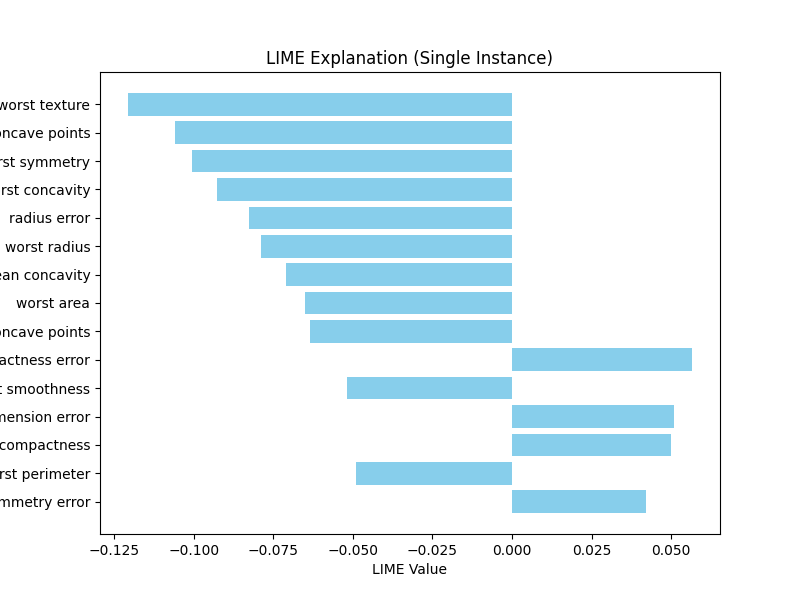

In [10]:
# -------- Bar Plot for Single Instance --------
print("[INFO] Explaining a single instance...")
single_df = X_test.head(1)
lime_single_df = explainer.explain(single_df)
print("[INFO] Plotting bar chart for single instance...")
explainer.plot(lime_single_df, original_df=single_df, max_instances=1)
display(Image("lime_output_single.png"))

In [5]:
import sys
import pandas as pd
from sklearn.datasets import load_breast_cancer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline


from pyspark.sql import SparkSession

In [4]:
spark = (
        SparkSession.builder
        .appName("LIME")
        .master("local[2]")  # adjust cores as needed
        .config("spark.jars.packages", "com.microsoft.azure:synapseml_2.12:1.0.11")
        .config("spark.jars.repositories", "https://mmlspark.azureedge.net/maven")
        .getOrCreate()
    )

spark.sparkContext.setLogLevel("ERROR")

25/08/27 07:21:05 WARN Utils: Your hostname, inuka-ampavila-HP-EliteBook-850-G7-Notebook-PC resolves to a loopback address: 127.0.1.1; using 192.168.1.7 instead (on interface wlp0s20f3)
25/08/27 07:21:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
https://mmlspark.azureedge.net/maven added as a remote repository with the name: repo-1
Ivy Default Cache set to: /home/inuka-ampavila/.ivy2/cache
The jars for the packages stored in: /home/inuka-ampavila/.ivy2/jars
com.microsoft.azure#synapseml_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-1901da6d-44a2-4df5-b7ae-f2cc77510b37;1.0
	confs: [default]


:: loading settings :: url = jar:file:/opt/spark-3.5.4/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


	found com.microsoft.azure#synapseml_2.12;1.0.11 in central
	found com.microsoft.azure#synapseml-core_2.12;1.0.11 in central
	found org.apache.spark#spark-avro_2.12;3.4.1 in central
	found org.tukaani#xz;1.9 in central
	found commons-lang#commons-lang;2.6 in central
	found org.scalactic#scalactic_2.12;3.2.14 in central
	found org.scala-lang#scala-reflect;2.12.15 in central
	found io.spray#spray-json_2.12;1.3.5 in central
	found com.jcraft#jsch;0.1.54 in central
	found org.apache.httpcomponents.client5#httpclient5;5.1.3 in central
	found org.apache.httpcomponents.core5#httpcore5;5.1.3 in central
	found org.apache.httpcomponents.core5#httpcore5-h2;5.1.3 in central
	found org.slf4j#slf4j-api;1.7.25 in central
	found commons-codec#commons-codec;1.15 in central
	found org.apache.httpcomponents#httpmime;4.5.13 in central
	found org.apache.httpcomponents#httpclient;4.5.13 in central
	found org.apache.httpcomponents#httpcore;4.4.13 in central
	found commons-logging#commons-logging;1.2 in centr

In [6]:
data = load_breast_cancer()
pdf = pd.DataFrame(data.data, columns=data.feature_names)
pdf["label"] = data.target

sdf = spark.createDataFrame(pdf)
input_cols = list(data.feature_names)

assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
lr = LogisticRegression(featuresCol="features", labelCol="label")
pipeline = Pipeline(stages=[assembler, lr])

model = pipeline.fit(sdf)

In [7]:
from scalablexplain.lime.spark_cluster import SparkLIMEExplainer

explainer = SparkLIMEExplainer(
        model=model,
        input_cols=input_cols,
        target_col="probability",
        target_classes=[1],   # explain the positive class
        num_samples=5000
    )

explainer.build_explainer(sdf)

In [8]:
# --------- Explain and Plot Multiple ---------
print("[INFO] Explaining multiple instances...")
multi_df = sdf.limit(50)
multi_result = explainer.explain(multi_df)

print("[INFO] LIME results (first few rows):")
multi_result.select("limeValues").show(truncate=False)

print("[INFO] Plotting LIME (multiple)...")
explainer.plot(multi_result, original_df=multi_df, max_instances=50)

[INFO] Explaining multiple instances...
[INFO] LIME results (first few rows):


+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|limeValues                                                                                                                                                                                                                                                                                                                                                                      

/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site

[INFO] LIME plot saved to lime_output_multi.png


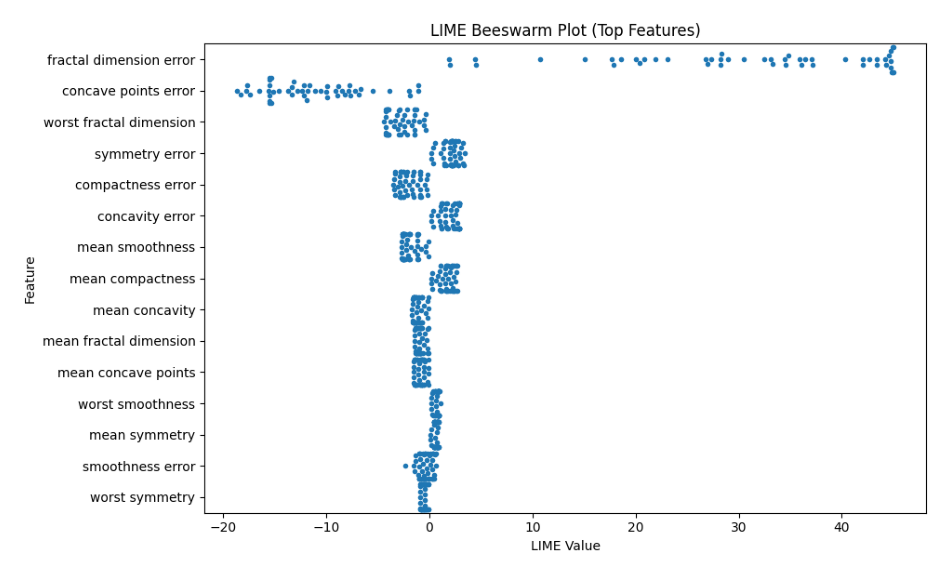

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('lime_output_multi.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
# --------- Explain and Plot Single ---------
print("[INFO] Explaining a single instance...")
single_df = sdf.limit(1)
single_result = explainer.explain(single_df)

print("[INFO] Plotting LIME (single)...")
explainer.plot(single_result, original_df=single_df, max_instances=1)

[INFO] Explaining a single instance...
[INFO] Plotting LIME (single)...
[INFO] LIME plot saved to lime_output_single.png


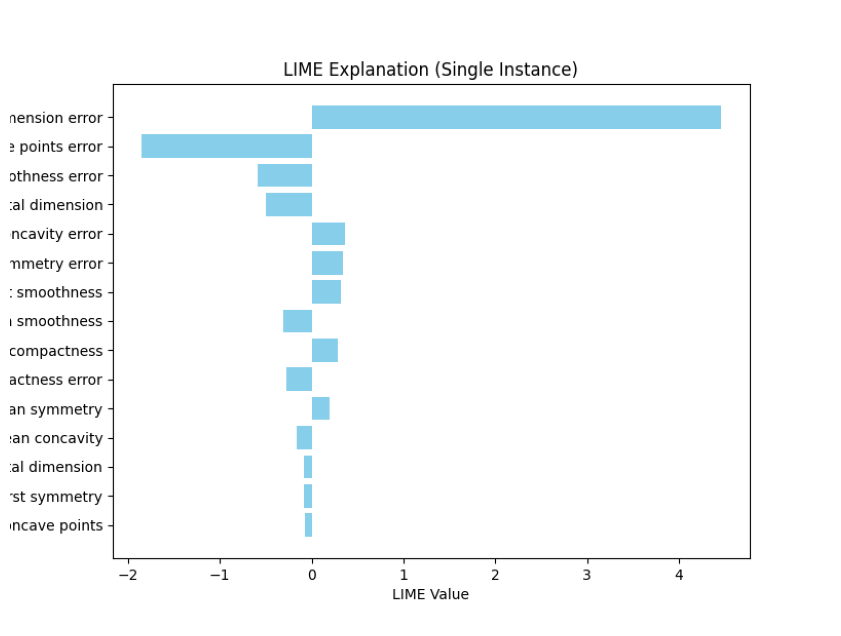

In [12]:
img = Image.open('lime_output_single.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()